Name : Krish Thakkar <br>
SAP : 60009230213 <br>
Batch : D2-2 <br>
ML Lab : 7


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

model = abc.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9777777777777777


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

abc = AdaBoostClassifier(n_estimators=50,base_estimator=NB,learning_rate=1)

model = abc.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy_nb)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Naive Bayes Accuracy: 0.9777777777777777


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=0)
model = AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy : %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy : 0.918 (0.029)


In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,random_state=6)

print(X.shape,y.shape)

(1000, 20) (1000,)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [ ]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,random_state=6)
model = AdaBoostRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = -n_scores
print('Mean Squared Error: %.3f (%.3f)' % (np.mean(mse_scores), np.std(mse_scores)))

Mean Squared Error: 8708.836 (999.167)


In [ ]:
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1,random_state=6)
model = AdaBoostRegressor()
model.fit(X,y)
row = [[-1.345, 0.2445, 5.4656, 3.678, -2.345, 1.678] + list(np.random.rand(14))]
yhat = model.predict(row)
print("prediction : %d" % yhat[0])

prediction : 161


In [ ]:
# Learning rate

In [ ]:
import numpy as np
from numpy import arange,mean,std

>0.100 0.906 (0.025)
>0.300 0.916 (0.024)
>0.500 0.920 (0.025)
>0.700 0.922 (0.022)
>0.900 0.921 (0.019)
>1.100 0.914 (0.027)
>1.300 0.911 (0.026)
>1.500 0.914 (0.022)
>1.700 0.904 (0.031)
>1.900 0.892 (0.038)


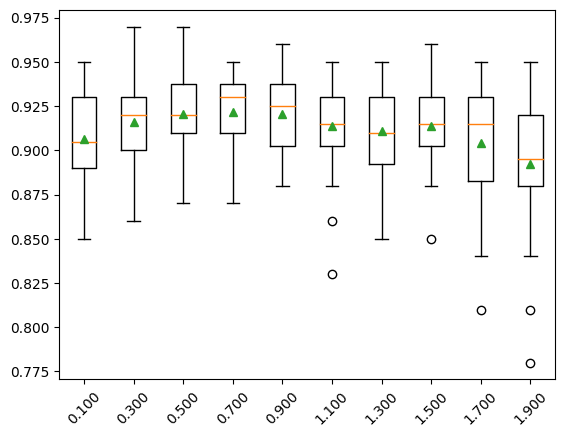

In [ ]:
def get_dataset():
  X,y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, random_state=0)
  return X,y
def get_models():
  models = dict()
  for i in arange(0.1,2.1,0.2):
    key = "%.3f" % i
    models[key] = AdaBoostClassifier(learning_rate=i)
  return models

def evaluate_model(model,X,y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
  return scores


X,y = get_dataset()
models = get_models()
results,names = list() , list()
for name,model in models.items():
  scores = evaluate_model(model,X,y)
  results.append(scores)
  names.append(name)

  print(">%s %.3f (%.3f)" % (name,mean(scores),std(scores)))
3
plt.boxplot(results,labels=names,showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Hyper parameter tuning with Grid Search CV

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
model = AdaBoostClassifier()

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813667 using {'learning_rate': 0.1, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.647000 (0.038136) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646667 (0.036545) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.647000 (0.038136) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.654333 (0.045511) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.672667 (0.046543) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.648333 (0.042197) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.671667 (0.045613) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.715000 (0.053213) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.767667 (0.045948) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.716667 (0.048876) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.767000

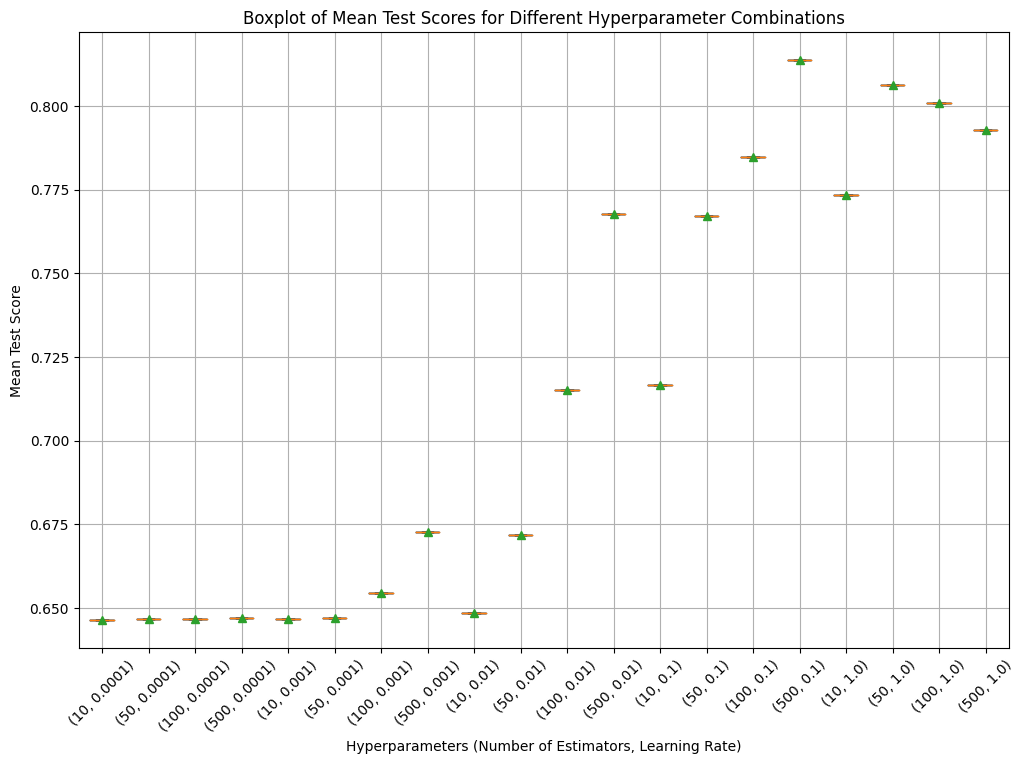

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean_test_scores = grid_result.cv_results_['mean_test_score']
n_estimators = [params['n_estimators'] for params in grid_result.cv_results_['params']]
learning_rates = [params['learning_rate'] for params in grid_result.cv_results_['params']]

scores_dict = {}
for i in range(len(mean_test_scores)):
    key = (n_estimators[i], learning_rates[i])
    if key not in scores_dict:
        scores_dict[key] = []
    scores_dict[key].append(mean_test_scores[i])

plt.figure(figsize=(12, 8))
plt.boxplot(scores_dict.values(), labels=scores_dict.keys(), showmeans=True)
plt.xlabel('Hyperparameters (Number of Estimators, Learning Rate)')
plt.ylabel('Mean Test Score')
plt.title('Boxplot of Mean Test Scores for Different Hyperparameter Combinations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()